In [2]:
# Ajay Choudhury(18018) -- DS-ML (Assignment 2)
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import normalized_mutual_info_score

In [3]:
# read the dataset
df = pd.read_csv("data.csv", header=None) # no headers present
df.head()

,0,1
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3000 non-null   float64
 1   1       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [5]:
# check for null values - no null values
df.isnull().sum()

0    0
1    0
dtype: int64

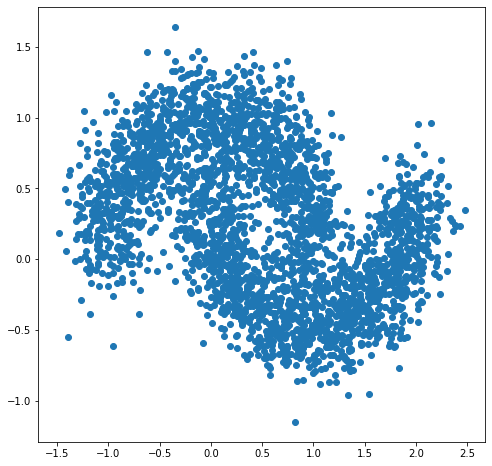

In [6]:
# plot the given data before scaling the data
plt.figure(figsize=(8, 8))
plt.scatter(df[0], df[1])
plt.show()

In [7]:
# Implementing MinMaxScaler to transform the data
scaler = MinMaxScaler()
df[0] = scaler.fit_transform(df[[0]])
df[1] = scaler.fit_transform(df[[1]])
df.head()

,0,1
0,0.225122,0.528484
1,0.362207,0.803618
2,0.800468,0.385298
3,0.458710,0.703172
4,0.859362,0.420614


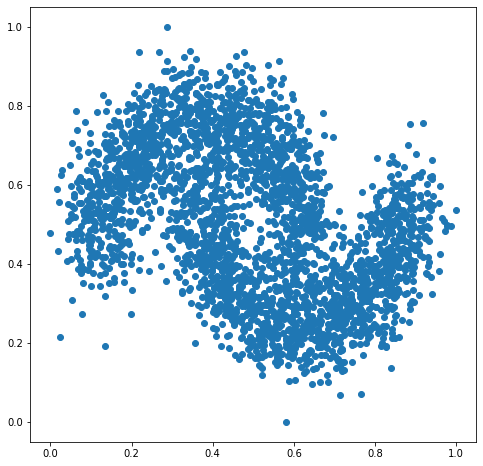

In [8]:
# plot after standardization
plt.figure(figsize=(8, 8))
plt.scatter(df[0], df[1])
plt.show()

In [9]:
# new copy of dataframe for kmeans clustering
df_km = df.copy()

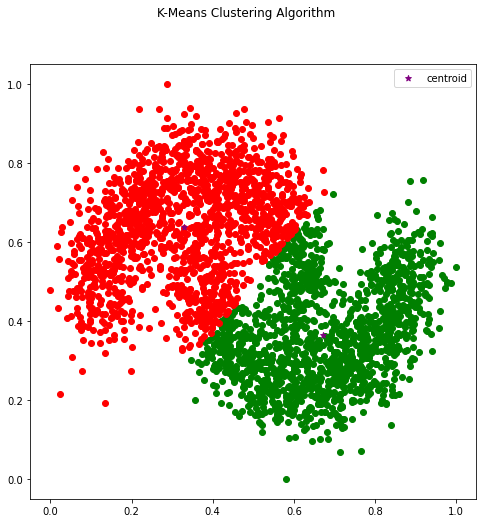

In [10]:
# Using Kmeans clustering
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_km[[0, 1]])

# adding labels
df_km['cluster'] = y_predicted
# print("The cluster centers are: ", km.cluster_centers_, "\n") # The centres of clusters

# plot the clusters
df1 = df_km[df_km.cluster==0]
df2 = df_km[df_km.cluster==1]

plt.figure(figsize=(8, 8))
plt.scatter(df1[0], df1[1], color='green')
plt.scatter(df2[0], df2[1], color='red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.legend()
plt.suptitle(f"K-Means Clustering Algorithm", fontsize=12)
plt.show()

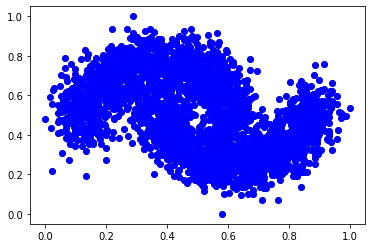

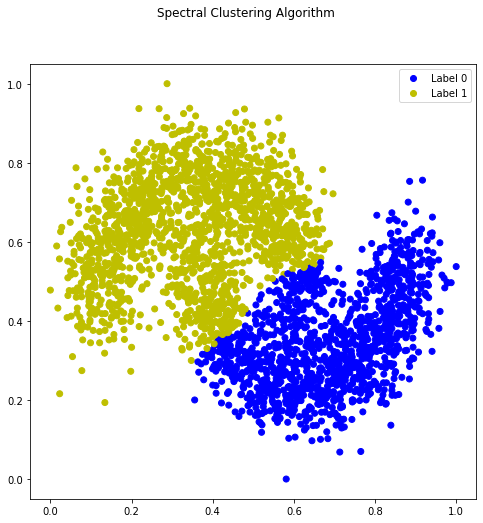

In [11]:
df_sc = df.copy()
# Spectral clustering
spectral_model = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
# Training the model and Storing the predicted cluster labels
labels = spectral_model.fit_predict(df_sc)

# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# Plotting the clustered scatter plot
y = plt.scatter(df_sc[0], df_sc[1], color='y')
b = plt.scatter(df_sc[0], df_sc[1], color='b')

plt.figure(figsize=(8, 8))
plt.suptitle(f"Spectral Clustering Algorithm", fontsize=12)
plt.scatter(df_sc[0], df_sc[1], c=cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

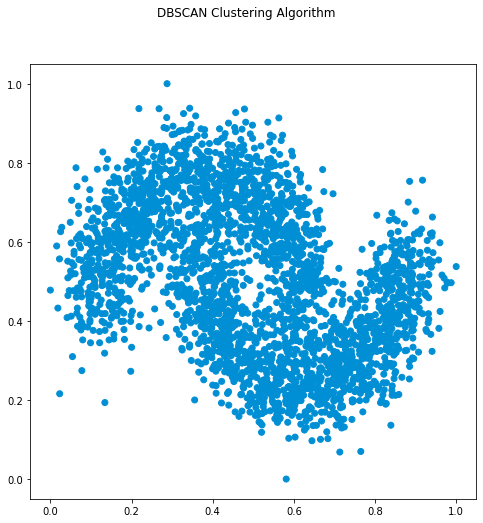

In [12]:
df_db = df.copy()
# dbscan algorithm
dbscan = DBSCAN(eps=0.3)
dbscan.fit(df_db)

# Plot the data and cluster
fig, (ax1) = plt.subplots(1, figsize=(8, 8))
fig.suptitle(f"DBSCAN Clustering Algorithm", fontsize=12)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax1.scatter(df_db.iloc[:,0], df_db.iloc[:, 1], c=db_colors)
plt.show()

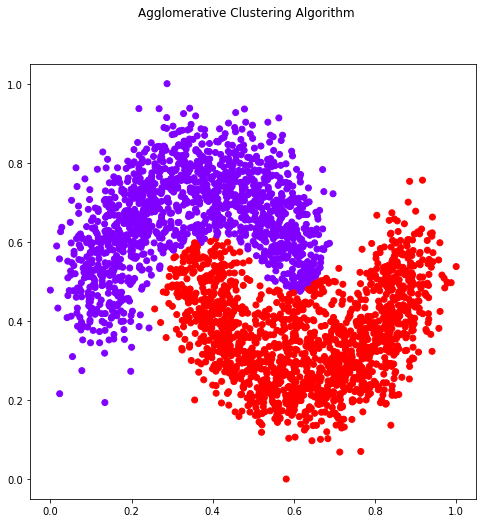

In [13]:
# Agglomerative clustering
db_ac = df.copy()
ac2 = AgglomerativeClustering(n_clusters = 2, linkage='ward')
ac2_pred = ac2.fit_predict(db_ac)

# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.suptitle(f"Agglomerative Clustering Algorithm", fontsize=12)
plt.scatter(db_ac[0], db_ac[1], c = ac2_pred, cmap ='rainbow')
plt.show()

In [14]:
ac2_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [15]:
df = pd.DataFrame(ac2_pred, columns = ['cluster'])
df

,cluster
0,0
1,0
2,1
3,0
4,1
...,...
2995,0
2996,1
2997,1
2998,0


In [16]:
# output a text file 
file = open("ajay_choudhury_labels.txt", "w")
np.savetxt(file, ac2_pred, fmt='%d')
file.close()

In [43]:
labels = pd.read_csv("labels.csv", header=None)
labels = labels[0].tolist()
labels_pred = df['cluster'].tolist()

In [46]:
len(labels)

3000

In [47]:
normalized_mutual_info_score(labels, labels_pred)

0.6835379236850933